In [1]:
library('Seurat')
library('Matrix')

Attaching SeuratObject

Attaching sp



In [2]:
# load in UMI count (expression) matrix
exp.mat <- readMM('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_at_scale_screen.exprs.mtx')
head(exp.mat)

6 x 207324 sparse Matrix of class "dgTMatrix"
                                                                               
[1,] . . . . . . . . . . . . . . . . . . . . . . . . 1 . 1 . . . . . . . ......
[2,] 1 . . . . . . . . . . . . . 2 . 1 . . . . . . . 1 . . . . . . 1 . . ......
[3,] 1 . 1 1 1 . . . . 1 1 . . . 3 . 4 1 . . . 1 . . 1 1 1 1 1 1 . . . . ......
[4,] . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[5,] . . 1 . . . . 1 . . . . . . . . . . . . . . . . . 1 . . . . 1 . . . ......
[6,] . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . ......

 .....suppressing 207290 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [3]:
# convert expression matrix from matrix to data frame format
exp.mat <- as.data.frame(exp.mat)
head(exp.mat)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V207315,V207316,V207317,V207318,V207319,V207320,V207321,V207322,V207323,V207324
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
3,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
4,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# read in column names and add to expression matrix
columns <- read.delim('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_at_scale_screen.cells.txt', header = FALSE)
columns <- columns$V1
colnames(exp.mat) <- columns
head(exp.mat)

,AAACCTGAGAGGTACC-1_1A_1_SI-GA-E2,AAACCTGAGTCAATAG-1_1A_1_SI-GA-E2,AAACCTGCAAACAACA-1_1A_1_SI-GA-E2,AAACCTGCACTTCTGC-1_1A_1_SI-GA-E2,AAACCTGCATGTAGTC-1_1A_1_SI-GA-E2,AAACCTGGTAGCGCAA-1_1A_1_SI-GA-E2,AAACCTGGTAGGGACT-1_1A_1_SI-GA-E2,AAACCTGGTATATGAG-1_1A_1_SI-GA-E2,AAACCTGGTCAAAGCG-1_1A_1_SI-GA-E2,AAACCTGGTCTTCAAG-1_1A_1_SI-GA-E2,⋯,TTTGTCACAACGATGG-1_2B_8_SI-GA-H9,TTTGTCACACTTCTGC-1_2B_8_SI-GA-H9,TTTGTCACAGATAATG-1_2B_8_SI-GA-H9,TTTGTCACAGCCAGAA-1_2B_8_SI-GA-H9,TTTGTCACATTAGGCT-1_2B_8_SI-GA-H9,TTTGTCAGTACCTACA-1_2B_8_SI-GA-H9,TTTGTCAGTATCACCA-1_2B_8_SI-GA-H9,TTTGTCAGTTCAGACT-1_2B_8_SI-GA-H9,TTTGTCAGTTCTGTTT-1_2B_8_SI-GA-H9,TTTGTCATCAAAGTAG-1_2B_8_SI-GA-H9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
3,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
4,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
# read in row names and add to expression matrix
rows <- read.delim('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_at_scale_screen.genes.txt', header = FALSE)
rows <- rows$V1
rownames(exp.mat) <- rows
head(exp.mat)

,AAACCTGAGAGGTACC-1_1A_1_SI-GA-E2,AAACCTGAGTCAATAG-1_1A_1_SI-GA-E2,AAACCTGCAAACAACA-1_1A_1_SI-GA-E2,AAACCTGCACTTCTGC-1_1A_1_SI-GA-E2,AAACCTGCATGTAGTC-1_1A_1_SI-GA-E2,AAACCTGGTAGCGCAA-1_1A_1_SI-GA-E2,AAACCTGGTAGGGACT-1_1A_1_SI-GA-E2,AAACCTGGTATATGAG-1_1A_1_SI-GA-E2,AAACCTGGTCAAAGCG-1_1A_1_SI-GA-E2,AAACCTGGTCTTCAAG-1_1A_1_SI-GA-E2,⋯,TTTGTCACAACGATGG-1_2B_8_SI-GA-H9,TTTGTCACACTTCTGC-1_2B_8_SI-GA-H9,TTTGTCACAGATAATG-1_2B_8_SI-GA-H9,TTTGTCACAGCCAGAA-1_2B_8_SI-GA-H9,TTTGTCACATTAGGCT-1_2B_8_SI-GA-H9,TTTGTCAGTACCTACA-1_2B_8_SI-GA-H9,TTTGTCAGTATCACCA-1_2B_8_SI-GA-H9,TTTGTCAGTTCAGACT-1_2B_8_SI-GA-H9,TTTGTCAGTTCTGTTT-1_2B_8_SI-GA-H9,TTTGTCATCAAAGTAG-1_2B_8_SI-GA-H9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237683,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
ENSG00000228463,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
ENSG00000237094,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000235373,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000228327,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
short.rows <- read.csv('./../data/short_rownames.csv')$X0
rownames(exp.mat) <- short.rows
head(exp.mat)

,AAACCTGAGAGGTACC-1_1A_1_SI-GA-E2,AAACCTGAGTCAATAG-1_1A_1_SI-GA-E2,AAACCTGCAAACAACA-1_1A_1_SI-GA-E2,AAACCTGCACTTCTGC-1_1A_1_SI-GA-E2,AAACCTGCATGTAGTC-1_1A_1_SI-GA-E2,AAACCTGGTAGCGCAA-1_1A_1_SI-GA-E2,AAACCTGGTAGGGACT-1_1A_1_SI-GA-E2,AAACCTGGTATATGAG-1_1A_1_SI-GA-E2,AAACCTGGTCAAAGCG-1_1A_1_SI-GA-E2,AAACCTGGTCTTCAAG-1_1A_1_SI-GA-E2,⋯,TTTGTCACAACGATGG-1_2B_8_SI-GA-H9,TTTGTCACACTTCTGC-1_2B_8_SI-GA-H9,TTTGTCACAGATAATG-1_2B_8_SI-GA-H9,TTTGTCACAGCCAGAA-1_2B_8_SI-GA-H9,TTTGTCACATTAGGCT-1_2B_8_SI-GA-H9,TTTGTCAGTACCTACA-1_2B_8_SI-GA-H9,TTTGTCAGTATCACCA-1_2B_8_SI-GA-H9,TTTGTCAGTTCAGACT-1_2B_8_SI-GA-H9,TTTGTCAGTTCTGTTT-1_2B_8_SI-GA-H9,TTTGTCATCAAAGTAG-1_2B_8_SI-GA-H9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AL627309.1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
ENSG00000228463,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
ENSG00000237094,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000235373,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000228327,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
gene.exp <- CreateSeuratObject(counts = exp.mat)
gene.exp

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 0 variable features)

In [8]:
gene.exp <- NormalizeData(gene.exp)
gene.exp

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 0 variable features)

In [9]:
gene.exp <- FindVariableFeatures(gene.exp, selection.method  = "vst")
gene.exp

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 2000 variable features)

In [10]:
gene.exp <- ScaleData(gene.exp, features = rownames(gene.exp))

Centering and scaling data matrix



In [11]:
gene.exp

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 2000 variable features)

In [22]:
for (gene in cc.genes$s.genes) {
    
    if (gene %in% cc.genes$g2m.genes) {
        print('not mutually exclusive')
    }
    
    print('mutually exclusive')
}

[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"
[1] "mutually exclusive"


In [23]:
length(cc.genes$s.genes)

[1] 43

In [24]:
length(cc.genes$g2m.genes)

[1] 54

In [16]:
?lapply

lapply {base},R Documentation
X,a vector (atomic or list) or an expression object. Other objects (including classed objects) will be coerced by base::as.list.
FUN,"the function to be applied to each element of X: see ‘Details’. In the case of functions like +, %*%, the function name must be backquoted or quoted."
...,optional arguments to FUN.
simplify,"logical or character string; should the result be simplified to a vector, matrix or higher dimensional array if possible? For sapply it must be named and not abbreviated. The default value, TRUE, returns a vector or matrix if appropriate, whereas if simplify = ""array"" the result may be an array of “rank” (=length(dim(.))) one higher than the result of FUN(X[[i]])."
USE.NAMES,"logical; if TRUE and if X is character, use X as names for the result unless it had names already. Since this argument follows ... its name cannot be abbreviated."
FUN.VALUE,a (generalized) vector; a template for the return value from FUN. See ‘Details’.
n,integer: the number of replications.
expr,"the expression (a language object, usually a call) to evaluate repeatedly."
x,"a list, typically returned from lapply()."
higher,"logical; if true, simplify2array() will produce a (“higher rank”) array when appropriate, whereas higher = FALSE would return a matrix (or vector) only. These two cases correspond to sapply(*, simplify = ""array"") or simplify = TRUE, respectively."


In [15]:
lapply(mylist, write, "test.txt", append=TRUE, ncolumns=1000)

[1] "list"

In [ ]:
gene.exp <- RunPCA(gene.exp, features = VariableFeatures(gene.exp), ndims.print = 1:5, nfeatures.print = 10)
gene.exp

In [ ]:
DimHeatmap(gene.exp, dims=4)

In [ ]:
# assign S phase and g2 + M phase genes to variables
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

In [ ]:
# assign cell cycle scores
gene.exp <- CellCycleScoring(gene.exp, s.features = s.genes, g2m.features = g2m.genes, set.ident=TRUE)
head(gene.exp[[]])

Picking joint bandwidth of 0.0421

Picking joint bandwidth of 0.041



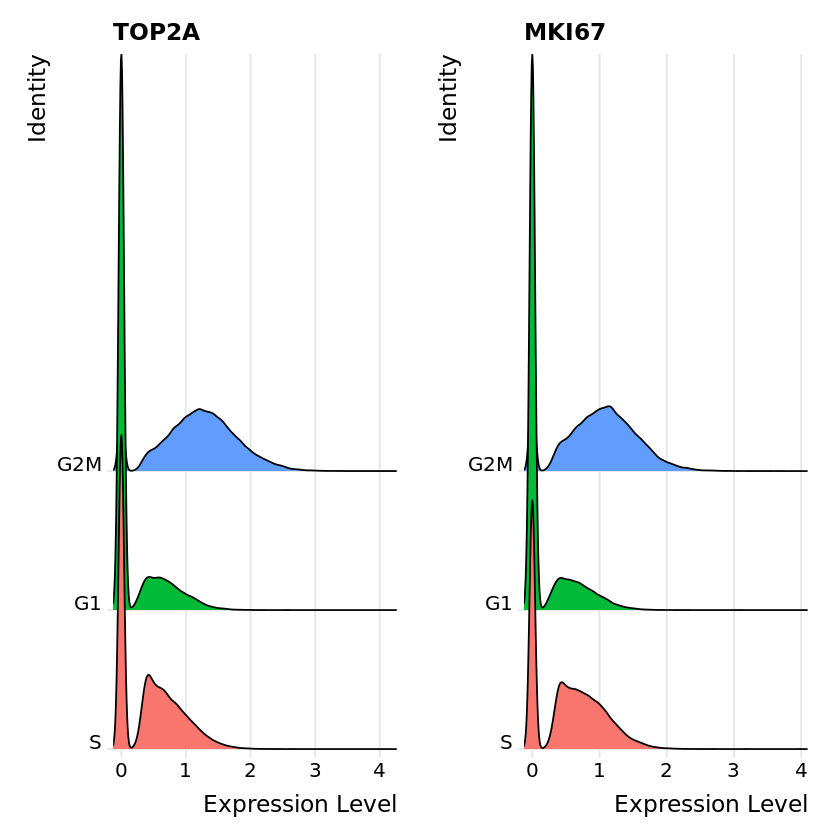

In [19]:
# generate Ridge Plot with Example Genes
RidgePlot(gene.exp, features=c("TOP2A", "MKI67"), ncol=2)

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 13 features requested have not been scaled (running reduction without them): MCM4, UHRF1, MLF1IP, GMNN, DSCC1, CASP8AP2, NUSAP1, UBE2C, SMC4, CCNB2, KIF20B, HMMR, GAS2L3”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  UNG, MCM5, CCNE2, DTL, POLD3, WDR76, HELLS, MCM2, CHAF1B, BRIP1 
	   MCM6, POLA1, CDC6, TIPIN, UBR7, CDCA7, RPA2, GINS2, RAD51, FEN1 
	   SLBP, PCNA, PRIM1, CDC45, RFC2, EXO1, E2F8, CTCF, MSH2, BLM 
Negative:  TOP2A, CENPF, TPX2, AURKA, HMGB2, CKS1B, MKI67, BIRC5, CENPA, DLGAP5 
	   CDC20, PSRC1, CKS2, CENPE, CDCA8, NEK2, KIF2C, CDK1, AURKB, BUB1 
	   NUF2, CDCA3, CKAP2, TACC3, GTSE1, NDC80, HN1, TUBB4B, CDCA2, LBR 
PC_ 2 
Positive:  GINS2, TYMS, PCNA, CLSPN, FEN1, CDC45, RFC2, SLBP, CDC6, ATAD2 
	   EXO1, CDCA7, MCM6, NASP, UNG, DTL, HELLS, WDR76, 

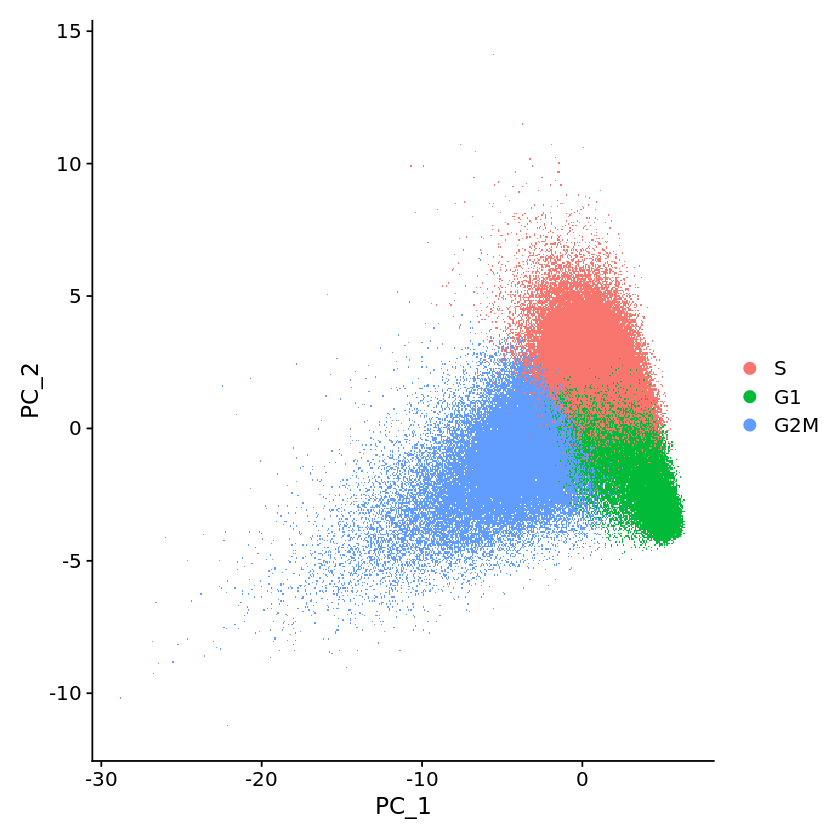

In [23]:
gene.exp <- RunPCA(gene.exp, features=c(s.genes, g2m.genes))
DimPlot(gene.exp)

In [25]:
# regress out cell cycle scores
gene.exp <- ScaleData(gene.exp, vars.to.regress = c("S.Score", "G2M.Score"), features=rownames(gene.exp))

Regressing out S.Score, G2M.Score



In [ ]:
# run PCA on regressed data
gene.exp <- RunPCA(gene.exp, features=VariableFeatures(gene.exp), nfeatures.print = 10)

In [ ]:
# run PCA on regressed data with cell cycle genes
gene.exp <- RunPCA(gene.exp, features = c(s.genes, g2m.genes))
